In [1]:
import enum

# Deep learning related imports
import torch
import enum
from utils.data_loading import *
from utils.visualizations import * 

In [2]:
class DatasetType(enum.Enum):
    CORA = 0,
    PPI = 1
    
class GraphVisualizationTool(enum.Enum):
    IGRAPH = 0
    
PPI_NUM_INPUT_FEATURES = 50
PPI_NUM_CLASSES = 121

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # checking whether you have a GPU

config = {
    'dataset_name': DatasetType.PPI.name,
    'num_of_epochs': 200,
    'patience_period': 100,
    
    'should_visualize': False,
    'batch_size': 1,
    'force_cpu': False,
    'should_test': True,
    'console_log_freq': 10,
    'checkpoint_freq': 5,
    'enable_tensorboard': True,
    'weight_decay': 0,
    'ppi_load_test_only': False,
    
    'lr': 5e-3,
    'num_of_layers': 3,  # PPI has got 42% of nodes with all 0 features - that's why 3 layers are useful
    'num_heads_per_layer': [4, 4, 6],  # other values may give even better results from the reported ones
    'num_features_per_layer': [PPI_NUM_INPUT_FEATURES, 256, 256, PPI_NUM_CLASSES],  # 64 would also give ~0.975 uF1!
    'add_skip_connection': True,  # skip connection is very important! (keep it otherwise micro-F1 is almost 0)
    'bias': True,  # bias doesn't matter that much
    'dropout': 0.0,  # dropout hurts the performance (best to keep it at 0)
    'layer_type': LayerType.IMP3  # the only implementation that supports the inductive setting
}

print("Cuda is available:", torch.cuda.is_available())

data_loader_train, data_loader_val, data_loader_test = load_graph_data(config, device)
# Let's fetch a single batch from the train graph data loader
node_features, node_labels, edge_index = next(iter(data_loader_train))

print('*' * 20)
print(node_features.shape, node_features.dtype)
print(node_labels.shape, node_labels.dtype)
print(edge_index.shape, edge_index.dtype)


Cuda is available: True
Loading train graph 1 to CPU. It has 1767 nodes and 34085 edges.
Loading train graph 2 to CPU. It has 1377 nodes and 31081 edges.
Loading train graph 3 to CPU. It has 2263 nodes and 61907 edges.
Loading train graph 4 to CPU. It has 2339 nodes and 67769 edges.
Loading train graph 5 to CPU. It has 1578 nodes and 37740 edges.
Loading train graph 6 to CPU. It has 1021 nodes and 19237 edges.
Loading train graph 7 to CPU. It has 1823 nodes and 46153 edges.
Loading train graph 8 to CPU. It has 2488 nodes and 72878 edges.
Loading train graph 9 to CPU. It has 591 nodes and 8299 edges.
Loading train graph 10 to CPU. It has 3312 nodes and 109510 edges.
Loading train graph 11 to CPU. It has 2401 nodes and 66619 edges.
Loading train graph 12 to CPU. It has 1878 nodes and 48146 edges.
Loading train graph 13 to CPU. It has 1819 nodes and 47587 edges.
Loading train graph 14 to CPU. It has 3480 nodes and 110234 edges.


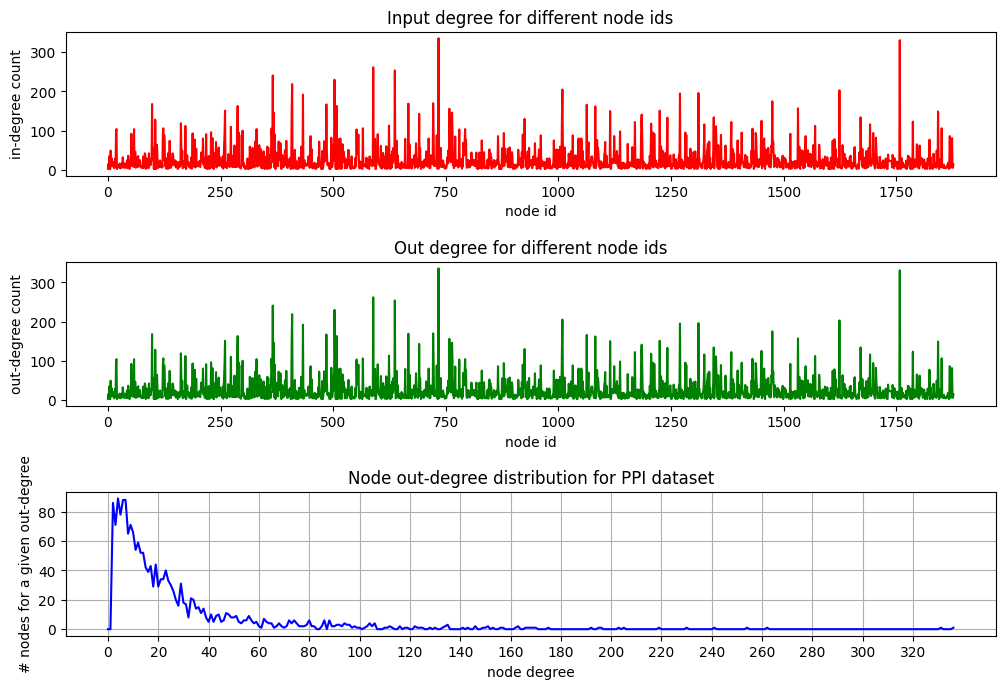

In [ ]:
#num_of_nodes = len(node_labels)
#plot_in_out_degree_distributions(edge_index, num_of_nodes, config['dataset_name'])

In [ ]:
from Scripts.script_PPI import * 

train_gat_ppi(config)

NameError: name 'config' is not defined